## Allstate Claim Prediction

### Goal of this activity:
**To better predict Bodily Injury Liability Insurance claim payments based on the characteristics of the insured customer’s vehicle.**

## Table of Contents
- [Loading dataset & checking high-level details](#Step-1:-Loading-Dataset-and-Checking-details) <br>
- [Data Dictionary](#Data-Dictionary)
- [Train Test Split](#Train-Test-Split)
- [Data Cleaning](#Data-Cleaning)
- [Feature Engineering](#Feature-Engineering)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.pandas.set_option('display.max_column',None)

C:\Users\rutvi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading Dataset and Checking details
The training data consists of observations from years - 2005 to 2007.


In [2]:
df_claimpred = pd.read_csv(r'C:\Rutvika\BrainStation\CapstoneProject\AllstateClaimPredictionChallenge\DataSets\NewDataSet\sample_final.csv', index_col='Row_ID', low_memory=False)
df_claimpred.head()

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48,16,3,2006,2005,X,X.38,X.38.0,C,C,A,C,A,B,?,A,B,A,F,B,4,-0.392708,0.394228,0.426171,0.316372,-0.210252,-0.275857,-1.021362,-0.188486,N,-0.23153,2.783616,-0.272337,-0.251419,24.205590
102,39,1,2006,2001,BH,BH.18,BH.18.5,B,C,F,A,A,B,C,A,B,A,F,C,2,-0.665897,-0.816152,-0.823407,-0.749192,-0.198358,-0.650165,-0.861623,-0.527934,B,-0.23153,2.783616,2.715490,-0.251419,2.624877
155,76,5,2005,2001,AJ,AJ.48,AJ.48.1,D,C,A,?,?,D,?,A,B,A,B,D,5,2.130275,0.826507,1.629469,1.162057,2.067504,1.162886,1.374723,0.452562,H,-0.23153,1.563723,-0.272337,2.404670,7.036577
212,103,1,2005,1995,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,B,A,B,2,-0.754282,-1.680709,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.193267,H,-0.23153,-0.266117,5.105752,-0.251419,8.432544
352,179,1,2005,1995,AJ,AJ.76,AJ.76.2,D,?,C,?,?,E,?,A,B,B,A,C,5,3.456046,0.307772,1.606328,0.400940,2.626535,1.360567,1.423873,-0.479145,M,-0.23153,-0.266117,-0.272337,-0.251419,89.927240


In [3]:
df_claimpred.shape

(95605, 34)

In [4]:
df_claimpred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95605 entries, 48 to 13183953
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Household_ID    95605 non-null  int64  
 1   Vehicle         95605 non-null  int64  
 2   Calendar_Year   95605 non-null  int64  
 3   Model_Year      95605 non-null  int64  
 4   Blind_Make      95605 non-null  object 
 5   Blind_Model     95605 non-null  object 
 6   Blind_Submodel  95605 non-null  object 
 7   Cat1            95605 non-null  object 
 8   Cat2            95605 non-null  object 
 9   Cat3            95605 non-null  object 
 10  Cat4            95605 non-null  object 
 11  Cat5            95605 non-null  object 
 12  Cat6            95605 non-null  object 
 13  Cat7            95605 non-null  object 
 14  Cat8            95605 non-null  object 
 15  Cat9            95605 non-null  object 
 16  Cat10           95605 non-null  object 
 17  Cat11           95605 non-null  

### Data Dictionary

**Independent Features:**   

- `Row_ID:` Index column
- `Household_ID:` Unique identifier for each household
- `Vehicle:` Unique identifier for each vehicle within a household
- `Calendar_Year:` Calendar year during which vehicle was insured (not blinded)
- `Model_Year:` Model year of vehicle (not blinded)
- `Blind_Make:` Vehicle make (example: ACME, coded A)
- `Blind_Model:` Vehicle model (example: ACME Roadster, coded A.1)
- `Blind_Submodel:` Vehicle submodel (example: ACME Roadster LS, coded A.1.1).  For the base model--e.g. no suffix after the model name--submodel is coded as 0
- `Cat1:` Categorical vehicle variable
- `Cat2:` Categorical vehicle variable
- `Cat3:` Categorical vehicle variable
- `Cat4:` Categorical vehicle variable
- `Cat5:` Categorical vehicle variable
- `Cat6:` Categorical vehicle variable
- `Cat7:` Categorical vehicle variable
- `Cat8:` Categorical vehicle variable
- `Cat9:` Categorical vehicle variable
- `Cat10:` Categorical vehicle variable
- `Cat11:` Categorical vehicle variable
- `Cat12:` Categorical vehicle variable
- `OrdCat:` Ordered categorical vehicle variable
- `Var1:` Continuous vehicle variable, mean 0 stdev 1
- `Var2:` Continuous vehicle variable, mean 0 stdev 1
- `Var3:` Continuous vehicle variable, mean 0 stdev 1
- `Var4:` Continuous vehicle variable, mean 0 stdev 1
- `Var5:` Continuous vehicle variable, mean 0 stdev 1
- `Var6:` Continuous vehicle variable, mean 0 stdev 1
- `Var7:` Continuous vehicle variable, mean 0 stdev 1
- `Var8:` Continuous vehicle variable, mean 0 stdev 1
- `NVCat:` Categorical non-vehicle variable
- `NVVar1:` Continuous non-vehicle variable, mean 0 stdev 1
- `NVVar2:` Continuous non-vehicle variable, mean 0 stdev 1
- `NVVar3:` Continuous non-vehicle variable, mean 0 stdev 1
- `NVVar4:` Continuous non-vehicle variable, mean 0 stdev 1 

**Target Feature:**  
- `Claim_Amount`: Non-negative real number, 99% zeros on the training set 

In above list of features all of with `Continuous vechical and non-vehical` has "mean" = 0 and "stdev" = 1, that refersthat the data in these features is standardization. So there is no need to standardize data before feeding to model. 

### Data Cleaning
Missing values: Checking for categorical features. 

In [5]:
missing_value_feature = [feature for feature in df_claimpred if df_claimpred[feature].isnull().sum()>0 and df_claimpred[feature].dtype=='object']
missing_value_feature

['Cat12']

In [6]:
print(f"There are {round(df_claimpred['Cat12'].isnull().mean(),4)}% of values are null in Cat12 feature. As this is categorical feature, mode value is used to fill null values.") 

There are 0.0019% of values are null in Cat12 feature. As this is categorical feature, mode value is used to fill null values.


In [7]:
for ccol in missing_value_feature:
    df_claimpred[ccol] = df_claimpred[ccol].fillna('Missing')

In [8]:
print(f"There are {round(df_claimpred['Cat12'].isnull().mean(),4)}% of values are null in Cat12 feature. As this is categorical feature, mode value is used to fill null values.") 

There are 0.0% of values are null in Cat12 feature. As this is categorical feature, mode value is used to fill null values.


Missing values: Checking for numerical features. 

In [9]:
missing_value_N_feature = [feature for feature in df_claimpred if df_claimpred[feature].isnull().sum()>0 and df_claimpred[feature].dtype=='number']
missing_value_N_feature

[]

There are no numerical features with NaN values.

In [10]:
df_claimpred[df_claimpred.duplicated()]

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Checked for duplicate values, no duplicate observations found.

### Feature Engineering
- Handling of Vehicle related features
    - 'Blind_Make', 'Blind_Model', and 'Blind_Submodel'

In [11]:
df_claimpred.columns

Index(['Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year', 'Blind_Make',
       'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5',
       'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'OrdCat',
       'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'NVCat',
       'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4', 'Claim_Amount'],
      dtype='object')

In [12]:
print(len(df_claimpred['Blind_Make'].unique()))
print(len(df_claimpred['Blind_Model'].unique()))
print(len(df_claimpred['Blind_Submodel'].unique()))

56
898
1825


- Features called 'Blind_Make','Blind_Model', and 'Blind_Submodel' has heirarchical relation i.e. each Make has multiple models and each Models has multiple submodels. Submodel has a unique combination of these 3 features. 
i.e. these features has hierarchical relationship, hence instead of all three features (details) we can have just high leve information about vehicle i.e. just Make and we can remove Model and Submodel.

In [13]:
df_claimpred = df_claimpred.drop(columns=['Blind_Model','Blind_Submodel'])
#df_claimpred = df_claimpred.drop(columns=['Blind_Model','Blind_Make'])

In [14]:
print(len(df_claimpred.columns))
df_claimpred.columns

32


Index(['Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year', 'Blind_Make',
       'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9',
       'Cat10', 'Cat11', 'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4',
       'Var5', 'Var6', 'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3',
       'NVVar4', 'Claim_Amount'],
      dtype='object')

- Handling of temerary features
    - 'Calendar_Year', 'Model_Year': From these 2 features we can derived vehicle's age at the time of incident by deviding Calender year from model year 
    - Hence, will introduced new feature called Vehicle_Age and will remove these 3 features
    

In [15]:
df_claimpred['Vehicle_Age'] = df_claimpred['Calendar_Year'] - df_claimpred['Model_Year'] 

In [16]:
df_claimpred = df_claimpred.drop(columns=['Calendar_Year','Model_Year'])
df_claimpred.head()

,Household_ID,Vehicle,Blind_Make,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount,Vehicle_Age
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48,16,3,X,C,C,A,C,A,B,?,A,B,A,F,B,4,-0.392708,0.394228,0.426171,0.316372,-0.210252,-0.275857,-1.021362,-0.188486,N,-0.23153,2.783616,-0.272337,-0.251419,24.205590,1
102,39,1,BH,B,C,F,A,A,B,C,A,B,A,F,C,2,-0.665897,-0.816152,-0.823407,-0.749192,-0.198358,-0.650165,-0.861623,-0.527934,B,-0.23153,2.783616,2.715490,-0.251419,2.624877,5
155,76,5,AJ,D,C,A,?,?,D,?,A,B,A,B,D,5,2.130275,0.826507,1.629469,1.162057,2.067504,1.162886,1.374723,0.452562,H,-0.23153,1.563723,-0.272337,2.404670,7.036577,4
212,103,1,AR,B,?,A,A,A,C,C,A,B,B,A,B,2,-0.754282,-1.680709,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.193267,H,-0.23153,-0.266117,5.105752,-0.251419,8.432544,10
352,179,1,AJ,D,?,C,?,?,E,?,A,B,B,A,C,5,3.456046,0.307772,1.606328,0.400940,2.626535,1.360567,1.423873,-0.479145,M,-0.23153,-0.266117,-0.272337,-0.251419,89.927240,10


#### Numerical features with skewed values
- Since we saw belloed mented numerical featues are not normally distributed, hence need to apply logorithmic transformations
    - Var8
    - NVVar1
    - NVVar2
    - NVVar3
    - NVVar4
    - Claim_Amount

In [17]:
# Apply log-transformation to
num_features = ['Var8','NVVar1','NVVar2','NVVar3','NVVar4','Claim_Amount']

for col in num_features:
    #df_claimpred[col] = np.log(df_claimpred[col]+1)
    print(f"{col}: MIN: {df_claimpred[col].min()}, Min + 1: {df_claimpred[col].min()+1}")

Var8: MIN: -1.9651488, Min + 1: -0.9651487999999999
NVVar1: MIN: -0.2315299, Min + 1: 0.7684701
NVVar2: MIN: -0.2661168, Min + 1: 0.7338832
NVVar3: MIN: -0.2723372, Min + 1: 0.7276628
NVVar4: MIN: -0.2514189, Min + 1: 0.7485811
Claim_Amount: MIN: 0.0001531019, Min + 1: 1.0001531019


As min values in these features are in minus (-), so before applying log need to add 1 to original value

In [18]:
#df_copy = df_claimpred.copy()

for col in num_features:
    df_claimpred[col] = np.log(df_claimpred[col]+1)
    print(f"{col}: MIN: {df_claimpred[col].min()}")

Var8: MIN: -7.929128787309516
NVVar1: MIN: -0.26335362372199544
NVVar2: MIN: -0.3094053910952305
NVVar3: MIN: -0.31791752490278563
NVVar4: MIN: -0.28957573095849476
Claim_Amount: MIN: 0.0001530901811002801


C:\Users\rutvi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
df_claimpred.head()

,Household_ID,Vehicle,Blind_Make,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount,Vehicle_Age
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48,16,3,X,C,C,A,C,A,B,?,A,B,A,F,B,4,-0.392708,0.394228,0.426171,0.316372,-0.210252,-0.275857,-1.021362,-0.208853,N,-0.263354,1.330680,-0.317918,-0.289576,3.227066,1
102,39,1,BH,B,C,F,A,A,B,C,A,B,A,F,C,2,-0.665897,-0.816152,-0.823407,-0.749192,-0.198358,-0.650165,-0.861623,-0.750637,B,-0.263354,1.330680,1.312511,-0.289576,1.287820,5
155,76,5,AJ,D,C,A,?,?,D,?,A,B,A,B,D,5,2.130275,0.826507,1.629469,1.162057,2.067504,1.162886,1.374723,0.373329,H,-0.263354,0.941460,-0.317918,1.225148,2.084003,4
212,103,1,AR,B,?,A,A,A,C,C,A,B,B,A,B,2,-0.754282,-1.680709,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,NaN,H,-0.263354,-0.309405,1.809231,-0.289576,2.244166,10
352,179,1,AJ,D,?,C,?,?,E,?,A,B,B,A,C,5,3.456046,0.307772,1.606328,0.400940,2.626535,1.360567,1.423873,-0.652283,M,-0.263354,-0.309405,-0.317918,-0.289576,4.510060,10


In [20]:
df_claimpred.isna().sum()

Household_ID       0
Vehicle            0
Blind_Make         0
Cat1               0
Cat2               0
Cat3               0
Cat4               0
Cat5               0
Cat6               0
Cat7               0
Cat8               0
Cat9               0
Cat10              0
Cat11              0
Cat12              0
OrdCat             0
Var1               0
Var2               0
Var3               0
Var4               0
Var5               0
Var6               0
Var7               0
Var8            8154
NVCat              0
NVVar1             0
NVVar2             0
NVVar3             0
NVVar4             0
Claim_Amount       0
Vehicle_Age        0
dtype: int64

In [21]:
print(f"After applying log, Var8 features got {df_claimpred['Var8'].isna().sum()} NaN values, so let's replace these values with Median value")

After applying log, Var8 features got 8154 NaN values, so let's replace these values with Median value


In [22]:
median = df_claimpred['Var8'].median()

df_claimpred['Var8'] = df_claimpred['Var8'].fillna(median)

In [23]:
df_claimpred.isna().sum()

Household_ID    0
Vehicle         0
Blind_Make      0
Cat1            0
Cat2            0
Cat3            0
Cat4            0
Cat5            0
Cat6            0
Cat7            0
Cat8            0
Cat9            0
Cat10           0
Cat11           0
Cat12           0
OrdCat          0
Var1            0
Var2            0
Var3            0
Var4            0
Var5            0
Var6            0
Var7            0
Var8            0
NVCat           0
NVVar1          0
NVVar2          0
NVVar3          0
NVVar4          0
Claim_Amount    0
Vehicle_Age     0
dtype: int64

### Checking correlation among Numerical features

After convertion of categorical features, let's check correlation coefficient to check the relation between each feature

C:\Users\rutvi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


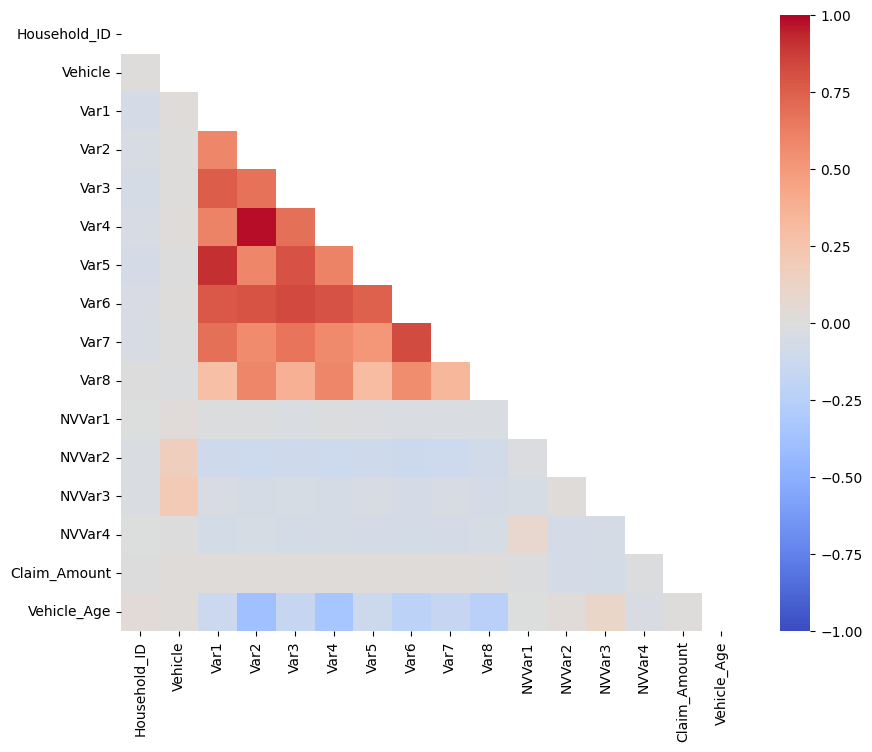

In [24]:
df_corr = df_claimpred.corr(numeric_only=True)

plt.figure(figsize=(10,8))
matrix = np.triu(df_corr, k=0)
sns.heatmap(df_corr, annot = True, cmap='coolwarm', vmin=-1, vmax=1, mask = matrix)
plt.show()

- As we see in EDA process that there were few features which has high corelation value those were Var1 with Var5 and Var2 with Var4, hence we need to one of the features from these pairs. 
- Between (Var1 and Var5), removing Var5 and from (Var4 and Var2), removing Var4 

In [25]:
#df_claimpred = df_claimpred.drop(columns=['Var5','Var4'])
df_claimpred.head()

,Household_ID,Vehicle,Blind_Make,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount,Vehicle_Age
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48,16,3,X,C,C,A,C,A,B,?,A,B,A,F,B,4,-0.392708,0.394228,0.426171,0.316372,-0.210252,-0.275857,-1.021362,-0.208853,N,-0.263354,1.330680,-0.317918,-0.289576,3.227066,1
102,39,1,BH,B,C,F,A,A,B,C,A,B,A,F,C,2,-0.665897,-0.816152,-0.823407,-0.749192,-0.198358,-0.650165,-0.861623,-0.750637,B,-0.263354,1.330680,1.312511,-0.289576,1.287820,5
155,76,5,AJ,D,C,A,?,?,D,?,A,B,A,B,D,5,2.130275,0.826507,1.629469,1.162057,2.067504,1.162886,1.374723,0.373329,H,-0.263354,0.941460,-0.317918,1.225148,2.084003,4
212,103,1,AR,B,?,A,A,A,C,C,A,B,B,A,B,2,-0.754282,-1.680709,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-0.265708,H,-0.263354,-0.309405,1.809231,-0.289576,2.244166,10
352,179,1,AJ,D,?,C,?,?,E,?,A,B,B,A,C,5,3.456046,0.307772,1.606328,0.400940,2.626535,1.360567,1.423873,-0.652283,M,-0.263354,-0.309405,-0.317918,-0.289576,4.510060,10


#### As per analysis of Household_ID and Vehicle, these features are used as unique identifiers for household and vehicle. Hence we can remove these columns.  

In [26]:
df_claimpred = df_claimpred.drop(columns=['Household_ID','Vehicle'])
df_claimpred.head()

,Blind_Make,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount,Vehicle_Age
Row_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48,X,C,C,A,C,A,B,?,A,B,A,F,B,4,-0.392708,0.394228,0.426171,0.316372,-0.210252,-0.275857,-1.021362,-0.208853,N,-0.263354,1.330680,-0.317918,-0.289576,3.227066,1
102,BH,B,C,F,A,A,B,C,A,B,A,F,C,2,-0.665897,-0.816152,-0.823407,-0.749192,-0.198358,-0.650165,-0.861623,-0.750637,B,-0.263354,1.330680,1.312511,-0.289576,1.287820,5
155,AJ,D,C,A,?,?,D,?,A,B,A,B,D,5,2.130275,0.826507,1.629469,1.162057,2.067504,1.162886,1.374723,0.373329,H,-0.263354,0.941460,-0.317918,1.225148,2.084003,4
212,AR,B,?,A,A,A,C,C,A,B,B,A,B,2,-0.754282,-1.680709,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-0.265708,H,-0.263354,-0.309405,1.809231,-0.289576,2.244166,10
352,AJ,D,?,C,?,?,E,?,A,B,B,A,C,5,3.456046,0.307772,1.606328,0.400940,2.626535,1.360567,1.423873,-0.652283,M,-0.263354,-0.309405,-0.317918,-0.289576,4.510060,10


### Handling of Categorical features
-  Creation of dummy variables (converting categorical features to numerical features)

In [27]:
print(f"Total number of features are : {df_claimpred.shape[1]}")
df_claimpred.columns

Total number of features are : 29


Index(['Blind_Make', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7',
       'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'OrdCat', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'NVCat', 'NVVar1',
       'NVVar2', 'NVVar3', 'NVVar4', 'Claim_Amount', 'Vehicle_Age'],
      dtype='object')

In [28]:
df_claimpred.select_dtypes('object').columns

Index(['Blind_Make', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7',
       'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'OrdCat', 'NVCat'],
      dtype='object')

In [29]:
for col in df_claimpred.select_dtypes('object').columns:
    print(f"{col} has {len(df_claimpred[col].unique())} values")

Blind_Make has 56 values
Cat1 has 11 values
Cat2 has 4 values
Cat3 has 7 values
Cat4 has 4 values
Cat5 has 4 values
Cat6 has 6 values
Cat7 has 5 values
Cat8 has 4 values
Cat9 has 2 values
Cat10 has 4 values
Cat11 has 7 values
Cat12 has 7 values
OrdCat has 8 values
NVCat has 15 values


In [30]:
pd.get_dummies(df_claimpred, dtype=int).info()

<class 'pandas.core.frame.DataFrame'>
Index: 95605 entries, 48 to 13183953
Columns: 158 entries, Var1 to NVCat_O
dtypes: float64(13), int32(144), int64(1)
memory usage: 63.5 MB


In [31]:
df_claimpred_final = pd.get_dummies(df_claimpred, dtype=int)

In [32]:
len(df_claimpred_final.columns)

158

In [33]:
X = df_claimpred_final.drop(columns=['Claim_Amount'])
y = df_claimpred_final['Claim_Amount']

#X.columns

Feature selection

In [34]:
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2


In [35]:
# Apply MinMax scaler for converting negative data to positive

from sklearn.preprocessing import MinMaxScaler

minmaxsaler = MinMaxScaler()
minmaxsaler.fit(X)

X_mm = minmaxsaler.transform(X)
#y = minmaxsaler.transform(y)

X_mm.shape, y.shape


((95605, 157), (95605,))

In [36]:
y1 = pd.DataFrame(y)
X1 = pd.DataFrame(X_mm)
X1.columns = X.columns
type(y1)
type(X1)
#X1 = X1.astype('float')
#y1 = y1.astype('float')
#X1.columns

pandas.core.frame.DataFrame

In [37]:
from sklearn.feature_selection import f_regression

# Apply SelectKBest class to extract top 10 best features
bestFeatures = SelectKBest(score_func=f_regression, k=10)
best_fit = bestFeatures.fit(X1, y1)

df_scores = pd.DataFrame(best_fit.scores_)
df_columns = pd.DataFrame(X1.columns)

#print(df_scores)
#print(df_columns)
#X1.columns

features_scores = pd.concat([df_columns,df_scores], axis=1)
#features_scores = pd.concat( df_scores,  axis=1)
features_scores.columns =['Column_Name', 'Scores']

features_scores.sort_values(by='Scores', ascending=False).head(30)

C:\Users\rutvi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Column_Name,Scores
154,NVCat_M,814.243568
10,NVVar3,510.921459
9,NVVar2,474.579295
155,NVCat_N,149.499498
153,NVCat_L,137.330428
151,NVCat_J,128.287781
143,NVCat_B,124.309974
3,Var4,52.436228
138,OrdCat_5,48.668272
1,Var2,47.331342


In [38]:
features_scores.sort_values(by='Scores', ascending=False).tail(20)

,Column_Name,Scores
104,Cat6_F,0.077228
42,Blind_Make_BR,0.074019
55,Blind_Make_L,0.048603
28,Blind_Make_AW,0.042861
115,Cat9_B,0.035123
114,Cat9_A,0.035123
58,Blind_Make_O,0.034464
88,Cat3_D,0.033668
48,Blind_Make_BZ,0.032699
22,Blind_Make_AN,0.017756


In [39]:
print(f"After converting categorical features to numerical features, now we have {df_claimpred_final.shape[1]} features, previously we were having 29 features.")

After converting categorical features to numerical features, now we have 158 features, previously we were having 29 features.


- As we finished with feature alterations, we can seperate independant and dependant features

In [40]:
df_claimpred_final.to_csv(r'C:\Rutvika\BrainStation\CapstoneProject\AllstateClaimPredictionChallenge\DataSets\NewDataSet\sample_after_eda_fe_2.csv')

In [41]:
features_scores.to_csv(r'C:\Rutvika\BrainStation\CapstoneProject\AllstateClaimPredictionChallenge\DataSets\NewDataSet\features_scores.csv')